<div style="display:Fill;
           border: 1px outset orange;
           border-radius: 50px 10px 50px;
           background-color:#C1FFC1">

<h1 style="color:black;
          font-size:25px;
          font-family:sans-serif;
          letter-spacing:1.0px;
          text-align:center">CUSTOMER LIFETIME VALUE [CLTV] in VahanBima 🚗</h1>
</div>

# <center><span style="color:#006400;">Table Of Contents 📚 </span></center>
<a id="toc"></a>
- [1. Libraries and Dataset Importing](#1)
- [2. Features and Label Description ](#2)
- [3. Segregation of Continuous and Categorical Features](#3)
- [4. Exploratory Data Analysis (EDA)](#4)
    - [4.1 Data Exploration](#4.1)
    - [4.2 Cardinality of features](#4.2)
    - [4.3 Visualization for Continuous Variables](#4.3)
    - [4.4 Visualization for Categorical Variables](#4.4)
- [5. Data Preprocessing and Feature Engineering](#5)
- [6. Correlation Matrix](#6)
- [7. Choosing Best Approach for model Building](#7)
- [8. Hyperparameter Tuning](#8)
- [9. Model Building](#9)

# AGENDA for this Problem:
## We have given a Problem related to Insurance and Finance Domain.
## Here a website named "VAHANBIMA" is analyzing a score for each customer who have taken Insurance from them using features like 'area', 'qualification', 'income', ' claim_amount', 'policy' and few more features which would define a score for each individual customer and called as "customer lifetime value(cltv)" i.e is the Number assigned to a customer.
## The performance metric used here is 'r2_score'.
## This problem was part of Analytics Vidya Jan 2023 Jobathon

<a id="1"></a>

# <div class="alert alert-success" ><font color=orange>**Libraries and Dataset Importing** ✅</font></div>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import scipy.stats as stats
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold
import optuna

In [55]:
full_train_data = pd.read_csv(r'S:\Hackathons and Jobathons\Analytics_Vidya_Jan23_JOB\train.csv')
test_data = pd.read_csv(r'S:\Hackathons and Jobathons\Analytics_Vidya_Jan23_JOB\test.csv')
submission = pd.read_csv(r'S:\Hackathons and Jobathons\Analytics_Vidya_Jan23_JOB\sample_submission.csv')

In [56]:
full_train_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [57]:
test_data.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver
59594,148987,Female,Urban,Bachelor,5L-10L,1,4,5939,More than 1,B,Platinum


In [58]:
train_data = full_train_data.drop('cltv',axis=1)

In [59]:
train_data.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
dtype: int64

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="2"></a>

# <div class="alert alert-success" ><font color=orange>**Features and Label Description ✅**</font></div>
* id  -- This is ID of a customer which is owner of the vehicle.
* gender -- This tells us gender of the person.
* area  --  This tells Area of customer(Categorised into 2 groups).
* qualification -- This tells Qualification of the person(Categorised into 3 groups).
* income -- This features tells income band of the customer(Categorised into 4 groups).
* marital_status -- This tells whether the customer is married or not.
* vintage -- This tells the no. of years since the first policy date(Categorised into 9 groups).
* claim_amount -- This tells the total amount claimed by the customer till now. 
* num_policies -- The total number of policies the customer owns(Categorised into 2 groups).
* policy -- This tells the Active Policy of the customer(Categorised into 3 groups).
* type_of_policy -- This tells the type of Active Policy(Categorised into 3 groups).

* cltv [LABEL][Customer Life Time Value] -- This is the Label which tells the customer lifetime value based on the activity and interaction of the customer with the platform(VahanBima)(Continuous Values)

<a id="3"></a>

# <div class="alert alert-success" ><font color=orange>**Segregation of Continuous and Categorical Features ✅**</font></div>

In [60]:
categorical_features = [i for i in train_data.columns if train_data[i].nunique() < 25]
continuous_features = [i for i in train_data.columns if train_data[i].nunique() >= 25]
print("Continuous Features : ",continuous_features)
print()
print("Categorical Features : ",categorical_features)

Continuous Features :  ['id', 'claim_amount']

Categorical Features :  ['gender', 'area', 'qualification', 'income', 'marital_status', 'vintage', 'num_policies', 'policy', 'type_of_policy']


In [61]:
print(f'\033[94mTotal number of features in training dataset: {len(train_data.columns)}')
print(f'\033[94mTotal number of features in testing dataset: {len(test_data.columns)}')
print(f'\033[94mNumber of categorical features: {len(categorical_features)}')
print(f'\033[94mNumber of continuous features: {len(continuous_features)}')

labels=['Categorical', 'Continuous']
values= [len(categorical_features), len(continuous_features)]
colors = ['#C1FFC1', '#00688B']
pyo.init_notebook_mode()
fig1 = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.08, 0], marker=dict(colors=colors, 
                line=dict(color='#000000', 
                          width=0.8)))])
fig1.show()

Total number of features in training dataset: 11
Total number of features in testing dataset: 11
Number of categorical features: 9
Number of continuous features: 2


#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
    1. There are 2 Continous and 9 categorical predictors in this dataset.
    2. The Target Variable('cltv') is Continuous for this dataset.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="4"></a>

# <div class="alert alert-success" ><font color=orange>**Exploratory Data Analysis [EDA] ✅**</font></div>

<a id="4.1"></a>

## <font color=teal>**Data Exploration**</font> 

In [62]:
for i in train_data.columns:
    print(train_data[i].value_counts())

2047     1
19100    1
2708     1
661      1
6806     1
        ..
19811    1
30052    1
32101    1
25958    1
2049     1
Name: id, Length: 89392, dtype: int64
Male      50497
Female    38895
Name: gender, dtype: int64
Urban    62455
Rural    26937
Name: area, dtype: int64
High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64
1    51444
0    37948
Name: marital_status, dtype: int64
6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64
0        17671
4006        38
3912        33
3834        32
3833        32
         ...  
12175        1
7230         1
11899        1
14560        1
15852        1
Name: claim_amount, Length: 10889, dtype: int64
More than 1    60263
1              29129
Name: num_policies, dtype: int64
A    56644
B    24635
C     8113
Name: 

In [63]:
for i in test_data.columns:
    print(test_data[i].value_counts())

133119    1
98981     1
90809     1
92856     1
119471    1
         ..
142639    1
140590    1
146733    1
144684    1
131072    1
Name: id, Length: 59595, dtype: int64
Male      33641
Female    25954
Name: gender, dtype: int64
Urban    41441
Rural    18154
Name: area, dtype: int64
High School    30835
Bachelor       26353
Others          2407
Name: qualification, dtype: int64
5L-10L           35088
2L-5L            14060
More than 10L     9163
<=2L              1284
Name: income, dtype: int64
1    34382
0    25213
Name: marital_status, dtype: int64
6    11901
7     8730
5     8337
4     7042
2     6018
8     5217
1     5109
3     4699
0     2542
Name: vintage, dtype: int64
0        11805
3846        26
3919        26
4055        26
3747        25
         ...  
14604        1
11290        1
14572        1
6376         1
11247        1
Name: claim_amount, Length: 9839, dtype: int64
More than 1    40308
1              19287
Name: num_policies, dtype: int64
A    37871
B    16448
C     5

In [64]:
print(train_data[train_data.duplicated()])
print()
print(test_data[test_data.duplicated()])

Empty DataFrame
Columns: [id, gender, area, qualification, income, marital_status, vintage, claim_amount, num_policies, policy, type_of_policy]
Index: []

Empty DataFrame
Columns: [id, gender, area, qualification, income, marital_status, vintage, claim_amount, num_policies, policy, type_of_policy]
Index: []


In [65]:
print(f'\033[94m')
print(train_data.isna().sum().sort_values(ascending = False))


type_of_policy    0
policy            0
num_policies      0
claim_amount      0
vintage           0
marital_status    0
income            0
qualification     0
area              0
gender            0
id                0
dtype: int64


In [66]:
print(f'\033[94m')
print(test_data.isna().sum().sort_values(ascending = False))


type_of_policy    0
policy            0
num_policies      0
claim_amount      0
vintage           0
marital_status    0
income            0
qualification     0
area              0
gender            0
id                0
dtype: int64


In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.5+ MB


In [68]:
train_data.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
id,89392.000000,44696.500000,25805.391969,1.000000,22348.750000,44696.500000,67044.250000,89392.000000
claim_amount,89392.000000,4351.502416,3262.359775,0.000000,2406.000000,4089.000000,6094.000000,31894.000000
vintage,89392.000000,4.595669,2.290446,0.000000,3.000000,5.000000,6.000000,8.000000
marital_status,89392.000000,0.575488,0.494272,0.000000,0.000000,1.000000,1.000000,1.000000


In [69]:
test_data.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
id,59595.000000,119190.000000,17203.738983,89393.000000,104291.500000,119190.000000,134088.500000,148987.000000
claim_amount,59595.000000,4368.504321,3288.132408,0.000000,2398.000000,4106.000000,6104.000000,32534.000000
vintage,59595.000000,4.620304,2.282511,0.000000,3.000000,5.000000,6.000000,8.000000
marital_status,59595.000000,0.576928,0.494051,0.000000,0.000000,1.000000,1.000000,1.000000


In [70]:
train_data.describe(include=["object", "bool"]).T.sort_values(by='freq',ascending = False)

,count,unique,top,freq
area,89392,2,Urban,62455
num_policies,89392,2,More than 1,60263
policy,89392,3,A,56644
income,89392,4,5L-10L,52716
gender,89392,2,Male,50497
type_of_policy,89392,3,Platinum,47796
qualification,89392,3,High School,46247


In [71]:
test_data.describe(include=["object", "bool"]).T.sort_values(by='freq',ascending = False)

,count,unique,top,freq
area,59595,2,Urban,41441
num_policies,59595,2,More than 1,40308
policy,59595,3,A,37871
income,59595,4,5L-10L,35088
gender,59595,2,Male,33641
type_of_policy,59595,3,Platinum,31908
qualification,59595,3,High School,30835


In [72]:
print(f'\033[94mNumber of rows in data                     :   {train_data.shape[0]}')
print(f'\033[94mNumber of columns in data                  :   {train_data.shape[1]}')
print(f'\033[94mTotal No. of rows with missing values data :   {sum(train_data.isna().sum())}')

Number of rows in data                     :   89392
Number of columns in data                  :   11
Total No. of rows with missing values data :   0


In [73]:
print(f'\033[94mNumber of rows in data                     :   {test_data.shape[0]}')
print(f'\033[94mNumber of columns in data                  :   {test_data.shape[1]}')
print(f'\033[94mTotal No. of rows with missing values data :   {sum(test_data.isna().sum())}')

Number of rows in data                     :   59595
Number of columns in data                  :   11
Total No. of rows with missing values data :   0


In [74]:
pd.crosstab(full_train_data["cltv"], train_data["type_of_policy"])

type_of_policy,Gold,Platinum,Silver
cltv,,,
24828,0,0,1
24876,0,0,1
25284,0,0,1
25536,0,1,0
25848,0,0,1
...,...,...,...
685128,0,0,1
687888,1,0,0
689808,0,0,1


<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="4.2"></a>

## <font color=teal>**Cardinality in Features**</font> 

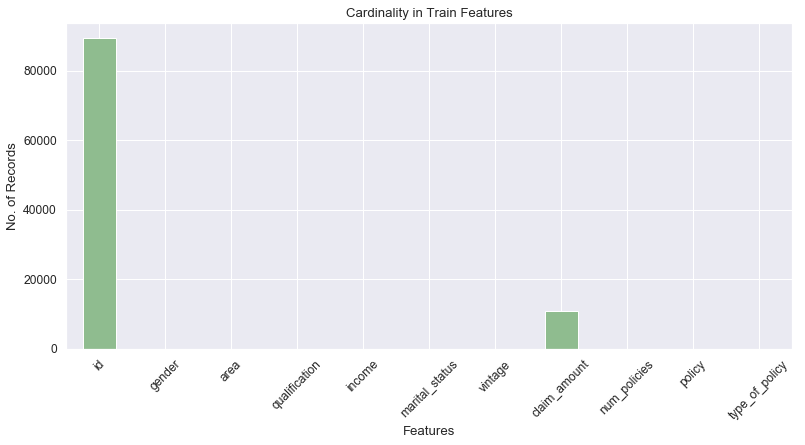

In [75]:
plt.figure(figsize = (13, 6))
train_data.nunique().plot.bar(title="Cardinality in Train Features",width = 0.5,color = 'darkseagreen')
plt.xticks(rotation = 45)
plt.ylabel("No. of Records")
plt.xlabel("Features")
plt.show()

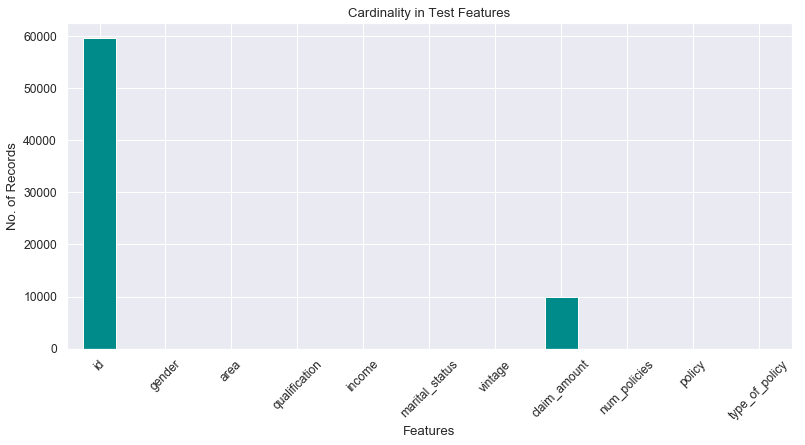

In [76]:
plt.figure(figsize = (13, 6))
test_data.nunique().plot.bar(title="Cardinality in Test Features",width = 0.5,color = 'darkcyan')
plt.xticks(rotation = 45)
plt.ylabel("No. of Records")
plt.xlabel("Features")
plt.show()

#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
    1. Dataset i.e including train and test data does not contain any null data.
    2. There is no duplicate data in the dataset.
    3. There are only 2 datatypes in the dataset i.e 'object' and 'int64'.
    4. Training Dataset contains approximately 89k datapoints and testing data contains approx. 59k datapoints.
    5. Cardinality is high in 'id' feature but its self reflectory that its a unique identifier in dataset so its does not 
       provide any insights to our model building. 2nd most high cardinality is of "claim_amount" which needs to be cut down
       into small bins so that this info is useful to our model building.
    6. Trend from training data is almost similar to trends in testing data.
    7. Highest number of groups are in 'vintage' predictor with 9 groups and major predictors have 2,3 groups inside of 
       them. 

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="4.3"></a>

## <font color=teal>**Visual EDA for Continuous Features**</font> 

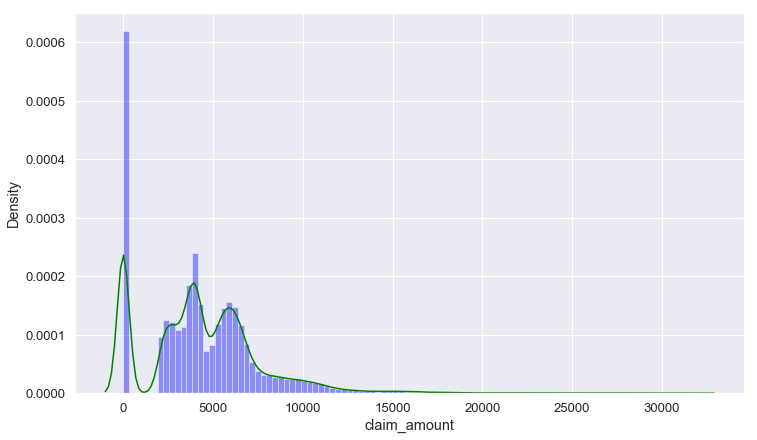

In [77]:
fig2 = sns.set(font_scale=1.2,
               style = 'darkgrid',
               rc={"figure.figsize": [12, 7]})
fig2 = sns.distplot(train_data["claim_amount"],color='blue',kde_kws={'color':'green'},bins=100)
plt.show()

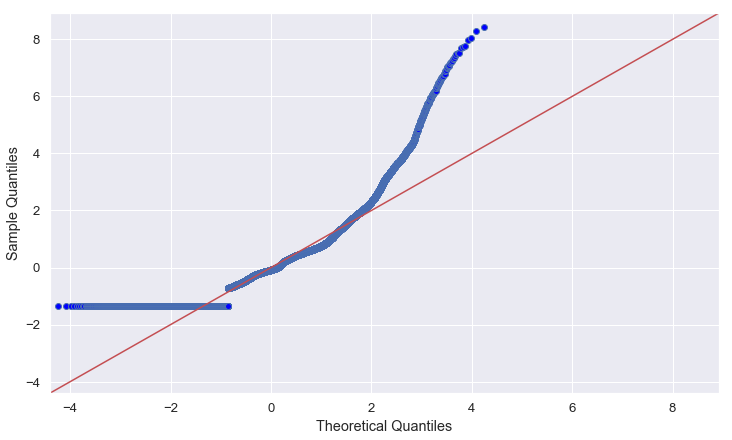

In [78]:
fig4 = sns.set(font_scale=1.2,
               style = 'darkgrid',
               rc={"figure.figsize": [12, 7]})
fig4 = sm.qqplot(train_data['claim_amount'],line='45',fit=True,dist=stats.norm)
plt.show()

In [79]:
group1 = train_data[train_data["claim_amount"].apply(lambda claim: claim == 0)].shape
group2 = train_data[train_data["claim_amount"].apply(lambda claim: claim > 0 and claim <= 5000 )].shape
group3 = train_data[train_data["claim_amount"].apply(lambda claim: claim > 5000 and claim <= 10000)].shape
group4 = train_data[train_data["claim_amount"].apply(lambda claim: claim > 10000)].shape
print('The Number of records in each groups of Train Data according to claim_amount binning are : ', group1[0],',',group2[0],',',group3[0],',',group4[0])

The Number of records in each groups of Train Data according to claim_amount binning are :  17671 , 36105 , 31000 , 4616


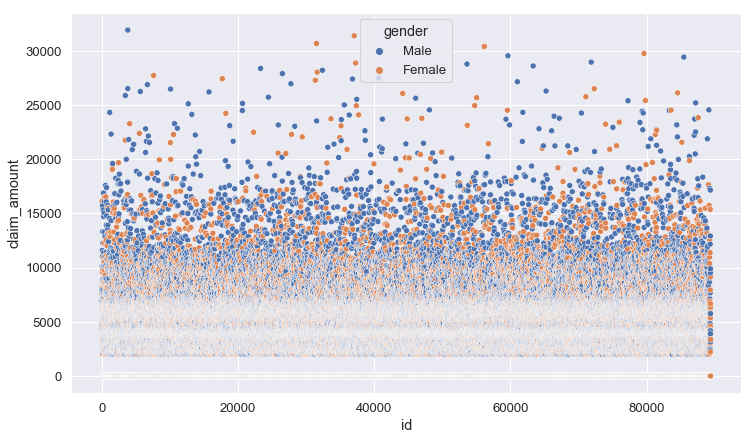

In [80]:
sns.scatterplot(train_data['id'],train_data['claim_amount'],hue=train_data['gender']);
plt.show()

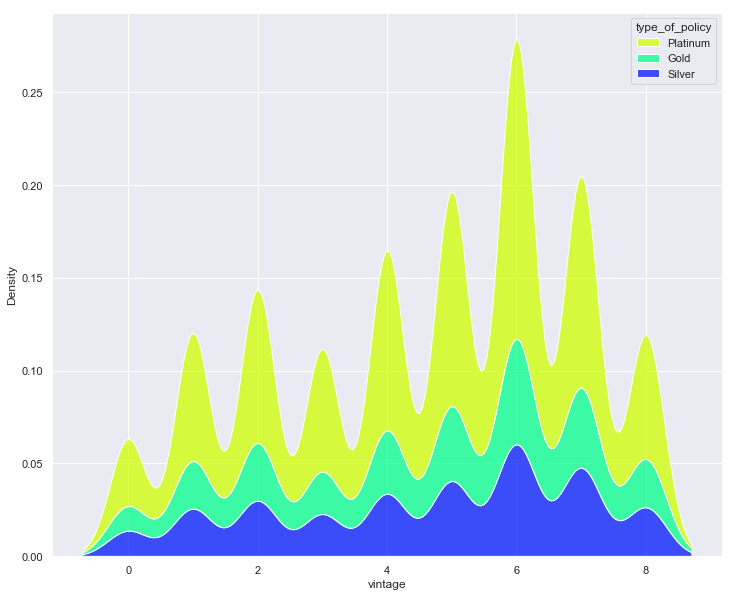

In [81]:
sns.set_theme(style='darkgrid',rc={"figure.figsize": [12, 10]})
sns.kdeplot(x =train_data['vintage'],hue = train_data['type_of_policy'],multiple='stack',palette='gist_rainbow')
plt.show()

#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
    1. From KDE PLOT of 'claim_amount' it is evident that the claim amounts are divided into groups upon claim amount equal
       to 0 then next checkpoint is 5000 and then 10000 so we would break the dataset into groups of them.
    2. 'claim_amount' certainly does not follow Normal Distribution
    3. It is clear that males and females claimed insurance amounts in a miscellaneous manner. 
    4. We would be removing 'id' predictor as it is unique to each record and does not provide any value to the model 
       building.
    5. Most number of Policies were of type "Platinum" then comes "Gold" and least bought was "Silver" and that too people
       having bought the policy 5-7 years back.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="4.4"></a>

## <font color=teal>**Visual EDA for Categorical Features**</font> 

### <font color ='red'>'gender' Feature</font>

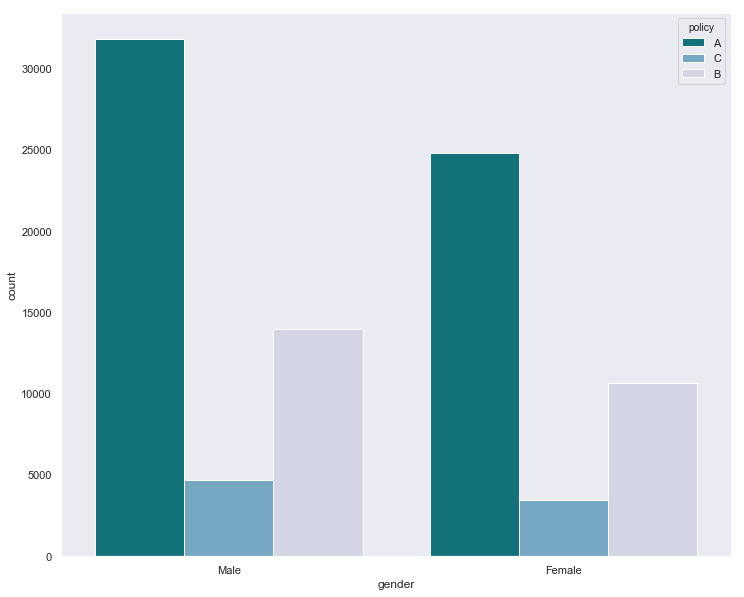

In [82]:
sns.set_theme(style='dark',rc={"figure.figsize": [12, 10]})
sns.countplot(train_data['gender'],hue=train_data['policy'],palette='PuBuGn_r')
plt.show()

In [83]:
train_data.groupby('gender')[['policy','type_of_policy','income','area']].describe().T

gender                   Female      Male
policy         count      38895     50497
               unique         3         3
               top            A         A
               freq       24811     31833
type_of_policy count      38895     50497
               unique         3         3
               top     Platinum  Platinum
               freq       20445     27351
income         count      38895     50497
               unique         4         4
               top       5L-10L    5L-10L
               freq       22220     30496
area           count      38895     50497
               unique         2         2
               top        Urban     Urban
               freq       26310     36145

### <font color ='red'>'area' Feature</font>

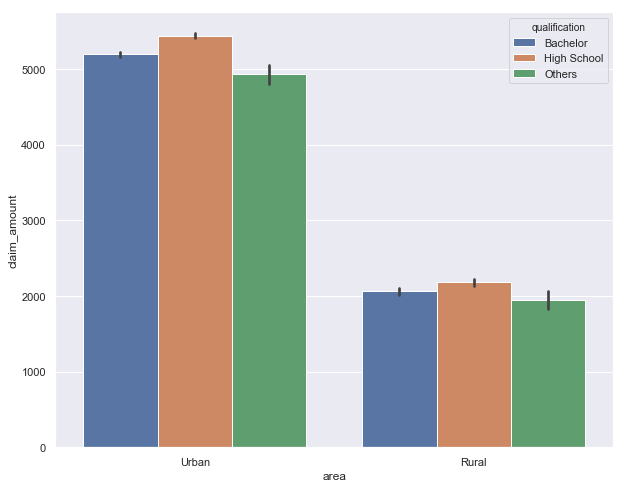

In [84]:
sns.set_theme(style='darkgrid',rc={"figure.figsize": [10, 8]})
sns.barplot(data=train_data, x="area",y="claim_amount",hue = 'qualification')
plt.show()

### <font color ='red'>'qualification' Feature</font>

In [85]:
pd.crosstab(train_data['qualification'],train_data['num_policies'])

num_policies,1,More than 1
qualification,,
Bachelor,12353,27046
High School,14947,31300
Others,1829,1917


### <font color ='red'>'income' & rest of the Features</font>

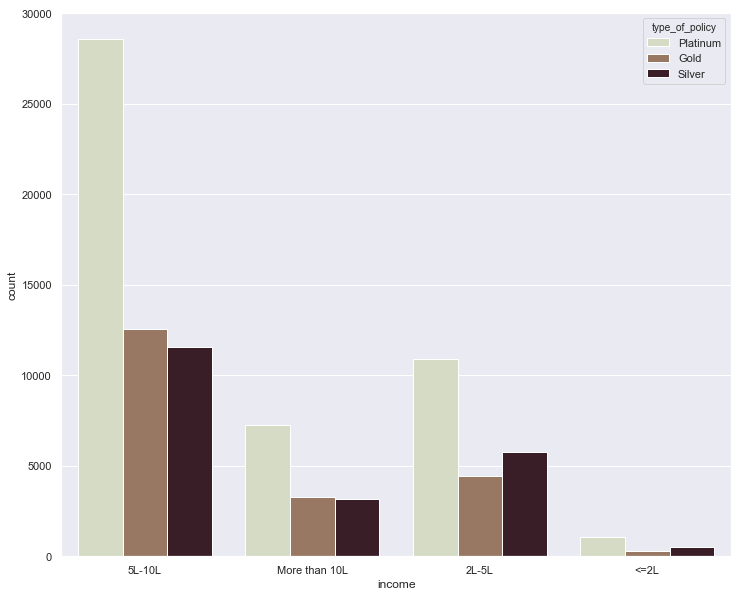

In [86]:
sns.set_theme(style='darkgrid',rc={"figure.figsize": [12, 10]})
sns.countplot(train_data['income'],hue=train_data['type_of_policy'],palette="ch:.55");

In [87]:
train_data.groupby('type_of_policy')[['policy','num_policies']].describe()

policy                   num_policies                      \
                count unique top   freq        count unique          top   
type_of_policy                                                             
Gold            20586      3   A  13704        20586      2  More than 1   
Platinum        47796      3   A  31746        47796      2  More than 1   
Silver          21010      3   A  11194        21010      2  More than 1   

                       
                 freq  
type_of_policy         
Gold            13828  
Platinum        33282  
Silver          13153

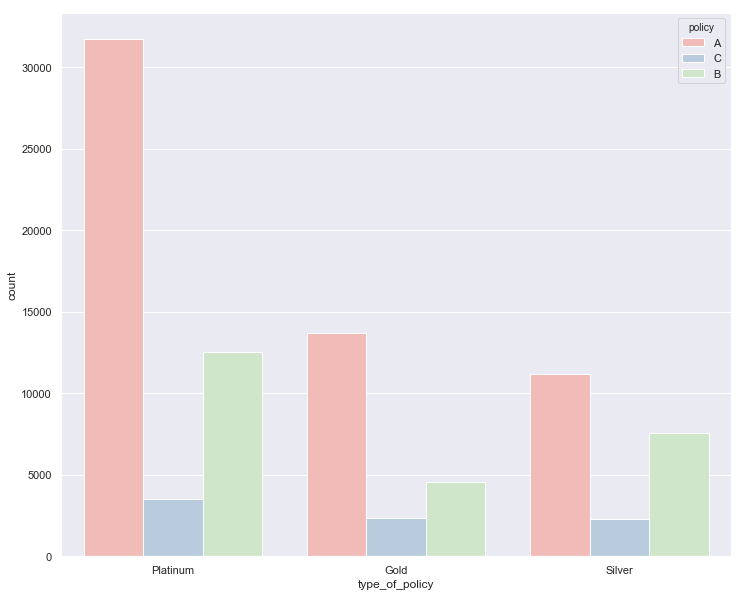

In [88]:
sns.set_theme(style='darkgrid',rc={"figure.figsize": [12, 10]})
sns.countplot(train_data['type_of_policy'],hue=train_data['policy'],palette="Pastel1");

In [89]:
train_data['vintage'].value_counts()

6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64

#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
    1. Be it Male or Female least policy purchased is 'C' preceded by 'B' and the maximum puchased policy i.e 'A'.
    2. Female customers are marginally lower than Male customers.
    3. For any qualification type be it 'High School', 'Bachelor' or 'others' the Urban area people's claim amount 
       is significantly more than Rural area people.
    4. 'High School' Qualified people bought more than 1 policy than 'Bachelor' or 'others'.
    5. People having income less than 5L are married and those who are not are in almost same ratio.
    6. People bought the most expensive policy i.e 'Platinum' irrespective of their income band.
    7. Policy 'A' in any type of version(be it Platinum or Gold or Silver is the best selling amongst three of 
       them i.e 'A','B' & 'C'.
    8. We would not modify the 'vintage' feature.
    9. We would not be performing OUTLIER DETECTION cause of very few continuous variables and that too is appropriate and 
       makes sense to data.

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="5"></a>

# <div class="alert alert-success" ><font color=orange>**Data Preprocessing and Feature Engineering✅**</font></div>

#### <div class="alert alert-info" ><font color=red>*Observations 📌*</font></div>
     1. It is clear from the EDA that features like 'area','qualification','income','type_of_policy' are ORDINAL VARIABLES,
     2. 'gender','marital_status','num_policies' are BINARY FEATURES, 
     3. 'policy' is NOMINAL VARIABLE whereas 
     4. 'claim_amount' would be categorised into smaller groups and
     5. 'id' feature which is unique identifier would be removed from the dataset.

In [90]:
nominal_features = ['gender','num_policies','policy']
ordinal_features = ['area','qualification','income','type_of_policy']

def encoding(data):
    
    new_data = data.copy()
    
    ohe = OneHotEncoder(drop='first',sparse = False, dtype = 'int64')
    ohe.fit(new_data[nominal_features])
    
    new_data[ohe.get_feature_names(nominal_features)] = pd.DataFrame(ohe.transform(new_data[nominal_features]))
    
    scale_area_mapper = {'Rural': 0, 'Urban': 1}
    scale_qualification_mapper = {'Others': 0, 'Bachelor': 1, 'High School': 2}
    scale_income_mapper = {'<=2L': 0, '2L-5L': 1, '5L-10L': 2, 'More than 10L': 3}
    scale_policy_type_mapper = {'Silver': 0, 'Gold': 1, 'Platinum': 2}
    
    new_data['area'] = new_data['area'].replace(scale_area_mapper)
    new_data['qualification'] = new_data['qualification'].replace(scale_qualification_mapper)
    new_data['income'] = new_data['income'].replace(scale_income_mapper)
    new_data['type_of_policy'] = new_data['type_of_policy'].replace(scale_policy_type_mapper)
    
    bins = [0,5000,10000]
    new_data['claim_amount'] = np.searchsorted(bins, new_data['claim_amount'].values)    
    new_data = new_data.drop(['gender','num_policies','policy','id'],axis = 1)

    return new_data
    
train_data = encoding(train_data)
test_data = encoding(test_data)

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="6"></a>

# <div class="alert alert-success" ><font color=orange>**Correlation Matrix✅**</font></div>

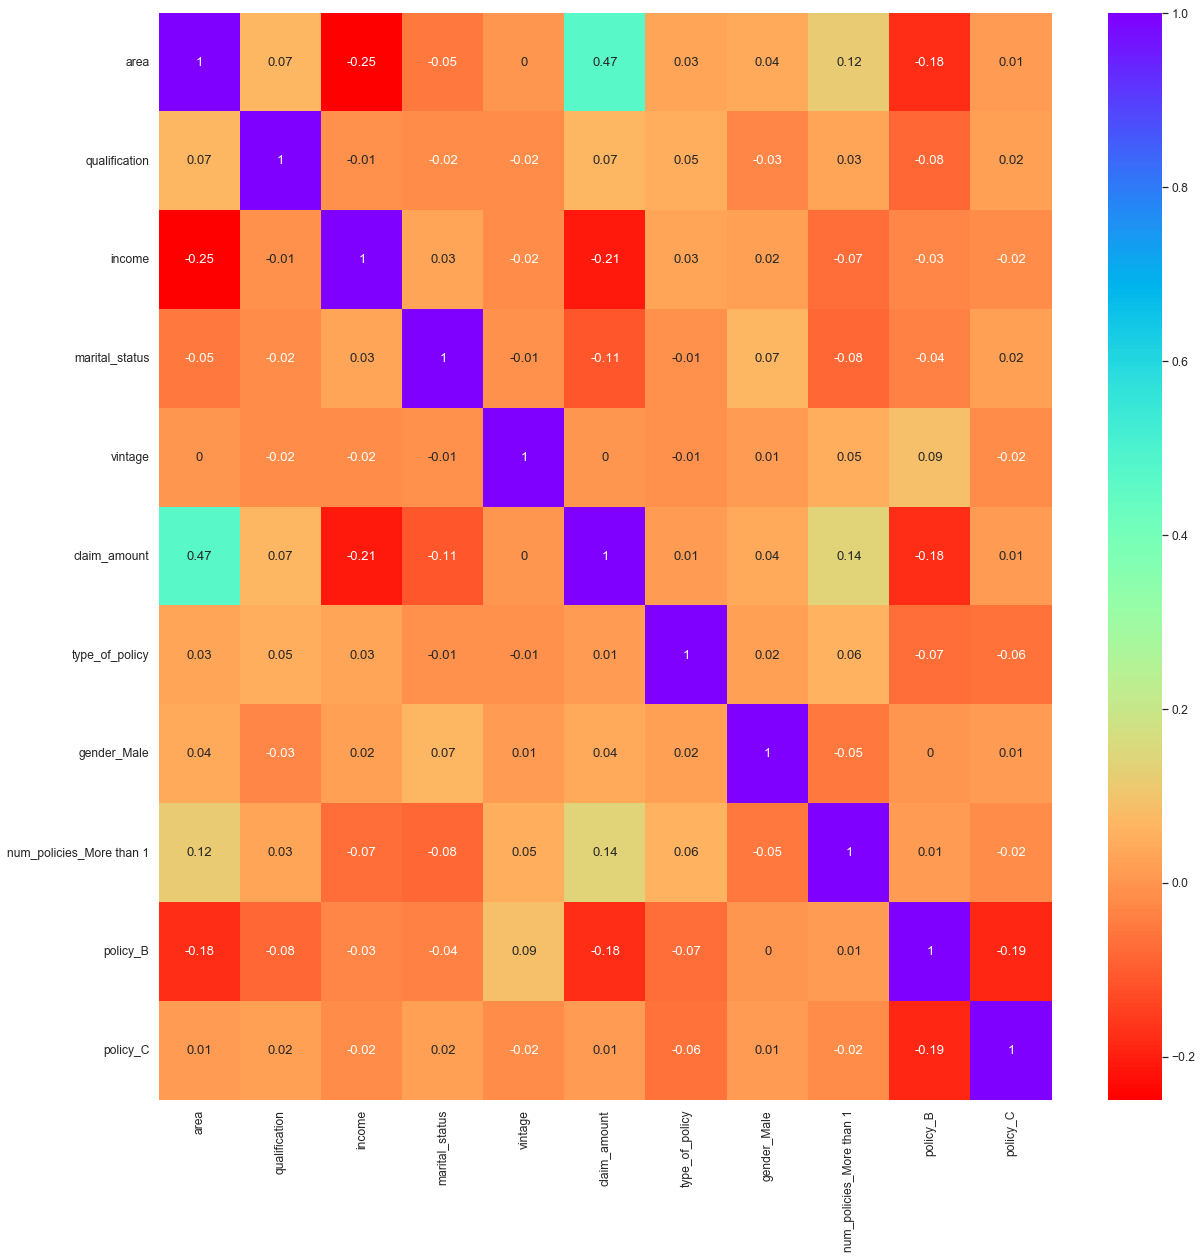

In [91]:
sns.set(font_scale=1.1,rc={"figure.figsize": [20, 20]})
sns.heatmap(train_data.corr().round(2),annot=True,cmap = 'rainbow_r');

In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   area                      89392 non-null  int64
 1   qualification             89392 non-null  int64
 2   income                    89392 non-null  int64
 3   marital_status            89392 non-null  int64
 4   vintage                   89392 non-null  int64
 5   claim_amount              89392 non-null  int64
 6   type_of_policy            89392 non-null  int64
 7   gender_Male               89392 non-null  int64
 8   num_policies_More than 1  89392 non-null  int64
 9   policy_B                  89392 non-null  int64
 10  policy_C                  89392 non-null  int64
dtypes: int64(11)
memory usage: 7.5 MB


In [93]:
y = full_train_data['cltv']

In [94]:
test_data.tail()

,area,qualification,income,marital_status,vintage,claim_amount,type_of_policy,gender_Male,num_policies_More than 1,policy_B,policy_C
59590,0,1,2,1,6,0,0,1,0,0,0
59591,1,2,2,0,6,0,1,1,0,0,1
59592,1,2,1,1,4,1,2,0,1,1,0
59593,0,1,2,0,1,1,0,1,1,0,0
59594,1,1,2,1,4,2,2,0,1,1,0


In [95]:
train_data.head()

,area,qualification,income,marital_status,vintage,claim_amount,type_of_policy,gender_Male,num_policies_More than 1,policy_B,policy_C
0,1,1,2,1,5,2,2,1,1,0,0
1,0,2,2,0,8,2,2,1,1,0,0
2,1,1,2,1,8,1,2,1,1,0,0
3,0,2,2,0,7,0,2,0,1,0,0
4,1,2,3,1,6,1,1,1,1,0,0


<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="7"></a>

# <div class="alert alert-success" ><font color=orange>**Choosing Best Approach For Model Building✅**</font></div>

In [96]:
regressors = [LinearRegression(),Lasso(),Ridge(),RandomForestRegressor(),GradientBoostingRegressor(),XGBRegressor()
              ,LGBMRegressor(),CatBoostRegressor(silent = True),AdaBoostRegressor()]

clf_dict = {0:'Linear Regression',
           1:'Lasso',
           2:'Ridge',
           3:'Random Forest',
           4:'Gradient Boost',
           5:'XGBoost Regressor',
           6:'LightGBM Regressor',
           7:'CatBoost Regressor',
           8:'Adaboost Regressor'
           }              
    
    
for i, model in enumerate(regressors):
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, train_data, y, cv=kfold, scoring='r2')
    print("%s CV SCORE: %f , Standard Deviation: %f" % (clf_dict[i], cv_results.mean(), cv_results.std()))

In [97]:
X_train,X_test,y_train,y_test = train_test_split(train_data,y,test_size=0.33,random_state = 42)

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="8"></a>

# <div class="alert alert-success" ><font color=orange>**Hyper Parameter Tuning✅**</font></div>

In [2]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',200,300)
    learning_rate = trial.suggest_float('learning_rate',0.0027,0.033,step = 0.001)
    max_depth = trial.suggest_int('max_depth',2,6)
    clf = GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth)
    clf.fit(X_train,y_train)

    r2score = clf.score(X_test,y_test)
    
    return r2score 



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
trial = study.best_trial

# The 'max_depth' and 'learning_rate' features were sized down to get the best results as earlier ran OPTUNA tuning for multiple times to bogged down to small limit

NameError: name 'optuna' is not defined

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>

<a id="9"></a>

# <div class="alert alert-success" ><font color=orange>**Model Building✅**</font></div>

In [102]:
GradientBoost = GradientBoostingRegressor(n_estimators=217,learning_rate=0.029,max_depth=4)
GradientBoost.fit(train_data,y)

Lasso()

In [103]:
submission

,id,cltv
0,89393,97952.828978
1,89394,97952.828978
2,89395,97952.828978
3,89396,97952.828978
4,89397,97952.828978
...,...,...
59590,148983,97952.828978
59591,148984,97952.828978
59592,148985,97952.828978
59593,148986,97952.828978


In [104]:
submission = submission.drop('cltv',axis=1)

In [105]:
submission['cltv'] = GradientBoostRegressor.predict(test_data)

In [106]:
submission

,id,cltv
0,89393,96150.960110
1,89394,127921.269046
2,89395,92897.382831
3,89396,86530.212164
4,89397,131334.798039
...,...,...
59590,148983,47681.917425
59591,148984,52037.574502
59592,148985,108776.841484
59593,148986,110184.792162


In [107]:
submission.to_csv('S:\Hackathons and Jobathons\Analytics_Vidya_Jan23_JOB\LinearRegressor.csv',index=False)

<center><a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a></center>